In [1]:
from PIL import Image
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def load_image(filename):
    img = Image.open(filename)
    pil_img = img.convert('RGB')
    arr = np.array(pil_img.getdata(), dtype=np.uint8).reshape(pil_img.height, pil_img.width, 3)
    img = [[(int(p[0]), int(p[1]), int(p[2])) for p in row] for row in arr]
    
    return img

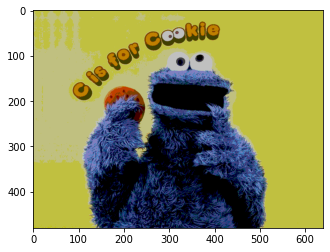

In [3]:
cookieMonster = load_image('CookieMonster.png')

plt.imshow(cookieMonster);

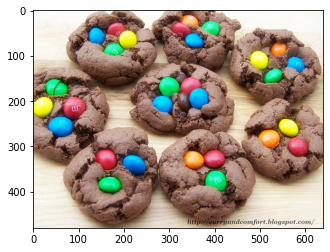

In [4]:
mm = load_image('M_M.png')

plt.imshow(mm);

In [5]:
# Get least significant bits (rightmost two bits)
def get_least_significant2(num):
    least_sig2 = int(num&0b11)
    
    return least_sig2

In [6]:
print(get_least_significant2(255))

3


In [7]:
# Get most significant bits (leftmost two bits)
def get_most_significant2(num):
    most_sig2 = num>>6
    
    return most_sig2

In [8]:
print(get_most_significant2(63))

0


In [9]:
print(format(63, "b"))
print(int('11', 2))

111111
3


In [10]:
# Takes in two integers; replaces the two least significant digits from context_val with the value of message_val
def embed_digits2(context_val, message_val):
    shift_right2 = context_val>>2
    shift_left2 = shift_right2<<2
    
    con_bin = format(shift_left2, "b")
    mes_bin = format(message_val, "b")
    
    sum_bin = format((int(con_bin, 2) + int(mes_bin, 2)), "b")
    
    return int(sum_bin, 2)

In [11]:
# Takes in two 2D array of tuples; returns a new image with message_img hidden in context_img's least significant 2 bits
def hide_secret_message_2bits(context_img, message_img):
    # Get row and column size
    # Context and Message image should have same size
    row_length = len(context_img)
    col_length = len(context_img[0])
    
    # Copy of Context_image
    context_copy = context_img
    
    # Loop through RGB values
    for row in range(row_length):
        for col in range(col_length):
            # Get message 2 most significant bits
            mes_most_sig = []
            for rgb in range(len(message_img[row][col])):
                mes_most_sig.append(get_most_significant2(message_img[row][col][rgb]))
            
            # Embed the 2 most significant bits into context image's last 2 significant bits
            embeded_rgb = []
            for rgb in range(len((context_img[row][col]))):
                embeded_rgb.append(embed_digits2(context_img[row][col][rgb], mes_most_sig[rgb]))
                
            context_copy[row][col] = embeded_rgb
            
    return context_copy

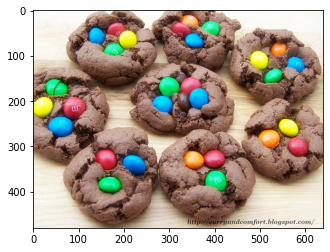

In [12]:
# Hide cookie monster image within m&m image
M_MWithMessage = hide_secret_message_2bits(mm, cookieMonster)

plt.imshow(M_MWithMessage);

In [13]:
# returns the hidden message within img_with_message
def recover_secret_message_2bits(img_with_message):
    # Get row and column size
    # Context and Message image should have same size
    row_length = len(img_with_message)
    col_length = len(img_with_message[0])
    
    # Copy of image
    img_message = img_with_message
    
    # Loop through RGB values
    for row in range(row_length):
        for col in range(col_length):            
            least_sig = []
            decoded_rgb = []
            for rgb in range(len(img_with_message[row][col])):
                # Get image least significant bits
                least_sig.append(get_least_significant2(img_with_message[row][col][rgb]))
                
                # Convert the hidden 2bit message into 8bit
                new_rgb = format(least_sig[rgb], "b") + "000000"
                decoded_rgb.append(int(new_rgb, 2)) 
                
            img_message[row][col] = decoded_rgb
            
    return img_message

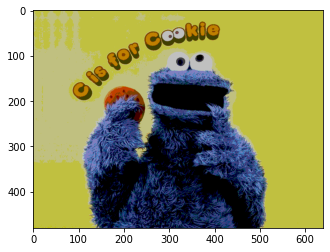

In [14]:
# returns cookie monster image within image
recMessage = recover_secret_message_2bits(M_MWithMessage)

plt.imshow(recMessage);